# Machine Learning notebook by Elizabeth Ho


# INTRODUCTION:
Fraud can be very costly to governments, companies and individuals.  One of the ways external auditing companies try to identify high risk firms that are committing fraud is to look at present and past financial statements, audit results as well as internal audit reports.  

# OBJECTIVE:
The objective of this project is to identify firms that may be committing fraud using machine learning.  We will be using supervised machine learning to apply classification models, to classify a firm as a fraud “risk” or “not a risk”, and regression models, to predict a risk value.

# DATA:
We were provided a dataset consisting of current and historical risk data for 776 firms.   The datset was split into two .csv files.  Trial.csv had 18 feature columns.  Audit_Risk.csv had 27 feature columns.  The two files we combined and columns that had the exact same values were removed.

The “Risk” feature was the target variable for the classification models.  The “Audit_Risk” feature was the target variable for the regression models.
The data was split so that 25% of the observations were held out and used as a test set for final scoring.  

# EXPLORATORY DATA ANALYSYS:
Box plots and scatter plots were used to find correlations in the data as well as identify outliers.  Due to the numerous outlier values for Audit_Risk we knew the linear models would not score well.

# DATA PREPARATION:
-	Missing data, Imputation Strategy and Feature Selection
>  LOCATION_ID and Money_Value had missing values.  Through EDA there appears to be no relationship with LOCATION_ID and Audit_Risk so LOCATION_ID was removed.
Money_Value had perfect collinearity with Risk_D so the missing value in Money_Value was imputed with the value that corresponded with Risk_D having a value of 0.  In this case all values of zero for the feature Risk_D had corresponding Money_Value of zero.  The observation with the missing value had a Risk_D value of zero so Money_Value was imputed to zero.
‘Detection_Risk’ was removed because all values were the same across all 767 firms.
-	Outliers
>  We did not want to remove any outliers because outliers could be an indication of fraud.  There was one observation that had a ‘Audit_Risk’ score almost four times the next highest Audit Value.  For the regression models we knew this would have a strong affect on the accuracy of our models.  The exception to this would be tree models where features with outliers could be separated from those without outliers making the model less sensitive to outliers.  With the understanding that we wanted to find a model robust to outliers, we kept this observation in the dataset.  We performed additional feature transformation to account for the regression target value.
-	Additional Feature Transformation
>  Due to the high variability of “Audit_Risk” values for the target variable in the regression models we transformed this feature to the log value.
-	Scaling Features
>  For regression models we used the standard scaler.  For classification models we used the MinMaxScaler to scale the features.

# CROSS-VALIDATION, GRID SEARCH AND HYPERPARAMETER TUNING
K-fold cross-validation was performed to prevent overfitting and to obtain the best hyperparameter settings using grid search.  We used a 5-fold cross validation.

# MODEL PERFORMANCE MEASURE
For regression models we measure performance by using r squared.  The r squared is a ratio of the explained variation of the response variable divided by the total variation.  A high r-squared was an indication that the model is able to predict the response variable well and the differences between the observed values and the predicted values are small and unbiased.<br><br>
For classification models we focused on the precision score because reducing the number of false negatives was important due to the high cost when a fraudulent firm is not identified.  This is a type II error that we wanted to reduce.  It is better to have some firms identified as a fraud risk when they are not.  The cost here would be the cost for additional auditing and inspecting.  
# FINAL RESULTS
The Random Forest Regressor model produced the highest r-squared and the Support Vector Machine Model using ‘radial basis function’ Kernel had the best score.  The extreme outlier for the target variable gave low results for linear models.  
We had mentioned that decision trees are robust to outliers.  Random Forest builds multiple trees and then merges then together.  It starts by taking a random subset of features and then takes the most important feature out of that subset.  
The most important features used in Random Forest was:<br>
Inherent_Risk: 0.8963099513148218  
CONTROL_RISK: 0.029997928786254683
Risk: 0.05822504301893194
RiSk_E: 0.0035927959830490607
Money_Value: 0.0025665982756030927
Risk_A: 0.0011916905117754098
Score: 0.0014966932444732642<br>
Decision Trees allow data to be split by evaluating the most important features before predicting a value for that observation.
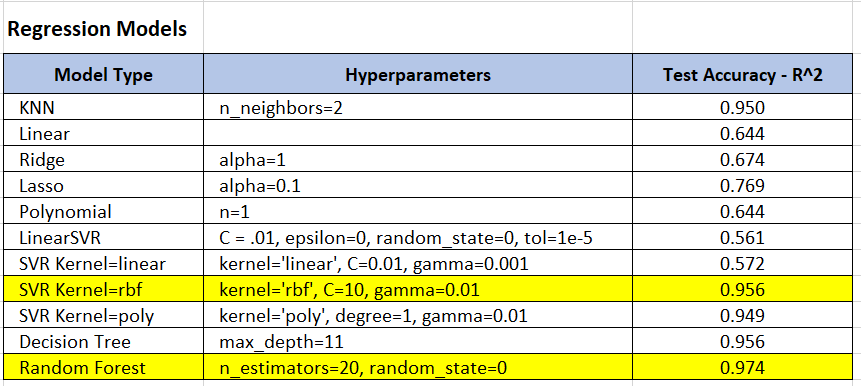



The model that worked best for classification was Decision Tree. 
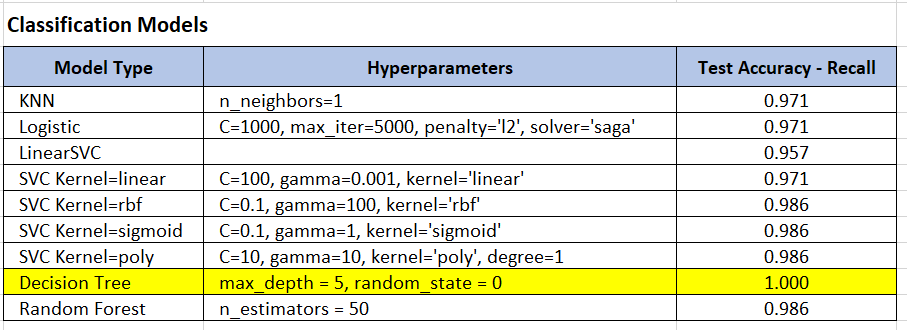

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
audit = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [2]:
audit_copy = audit.copy()
trial_copy = trial.copy()

In [3]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [4]:
audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

# Compare tables and remove redundant features with equal values

In [5]:
trial['SCORE_A'] = trial['SCORE_A']/10

In [6]:
trial['SCORE_B'] = trial['SCORE_B']/10

In [7]:
trial['SCORE_A'].equals(audit['Score_A'])

True

In [8]:
trial['SCORE_B'].equals(audit['Score_B'])

True

In [9]:
trial['Sector_score'].equals(audit['Sector_score'])

True

In [10]:
trial['LOCATION_ID'].equals(audit['LOCATION_ID'])

True

In [11]:
trial['PARA_A'].equals(audit['PARA_A'])

True

In [12]:
trial['PARA_B'].equals(audit['PARA_B'])

True

In [13]:
trial['History'].equals(audit['History'])

True

In [14]:
trial['TOTAL'].equals(audit['TOTAL'])

True

In [15]:
trial['numbers'].equals(audit['numbers'])

True

In [16]:
trial['Score'].equals(audit['Score'])

True

In [17]:
trial['Money_Value'].equals(audit['Money_Value'])

True

In [18]:
trial['District'].equals(audit['District_Loss'])

True

In [19]:
trial['Risk'].equals(audit['Risk'])

False

In [20]:
trial.drop(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Score', 'History', 'Money_Value', 'District'], axis=1, inplace=True)

In [21]:
trial.rename(inplace=True,columns={'Risk':'T_Risk'})

In [22]:
trial.columns

Index(['Marks', 'MONEY_Marks', 'Loss', 'LOSS_SCORE', 'History_score',
       'T_Risk'],
      dtype='object')

In [23]:
data = pd.concat([audit, trial], axis='columns')

In [24]:
data_copy = data.copy()

In [25]:
data.shape

(776, 33)

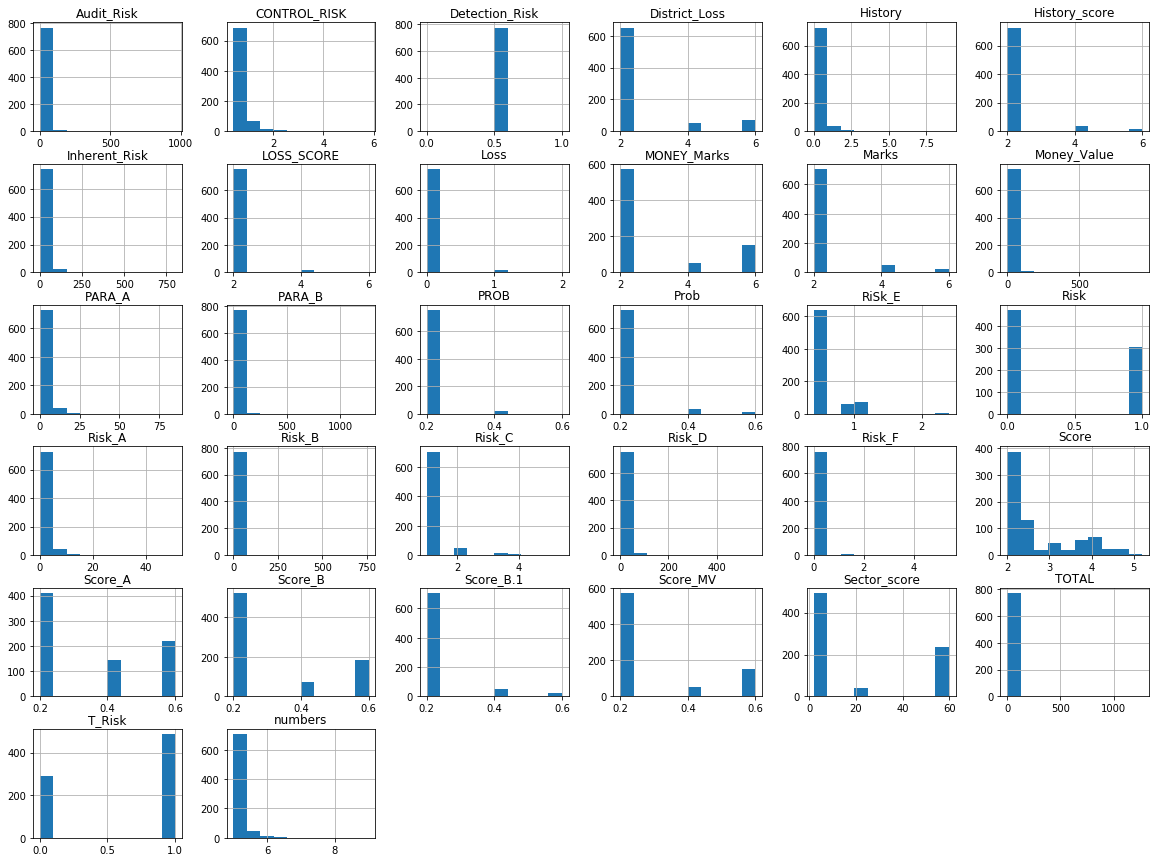

In [26]:
%matplotlib inline   
import matplotlib.pyplot as plt

data.hist(bins=10, figsize=(20,15))
plt.show()

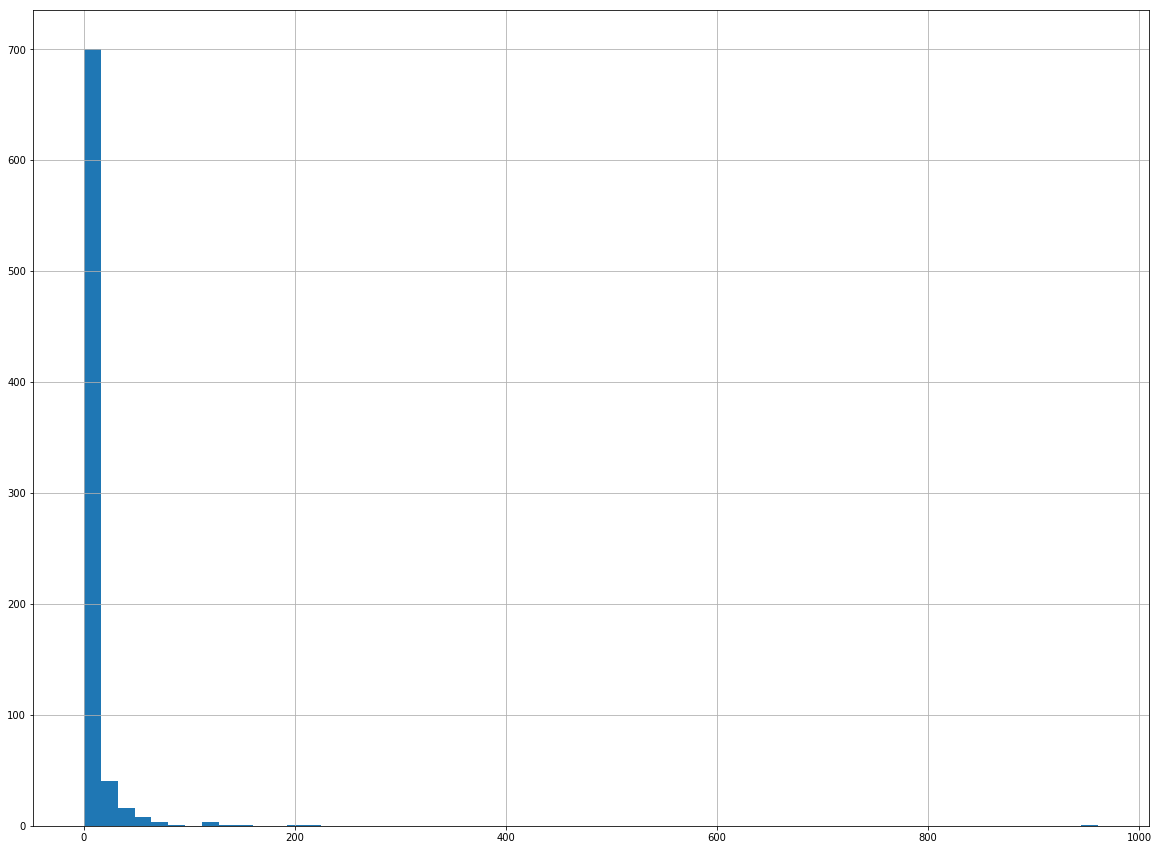

In [27]:
%matplotlib inline   
import matplotlib.pyplot as plt

data.Audit_Risk.hist(bins=60, figsize=(20,15))
plt.show()

(0, 1)

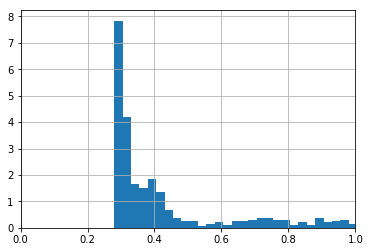

In [28]:
%matplotlib inline  

x = data['Audit_Risk']
min_range, max_range = 0, 1
min_all, max_all = min(x), max(x)
range_ratio = (max_all - min_all) / (max_range - min_range)
x.hist(bins=int(round(40 * range_ratio)), density=True)
plt.xlim(min_range, max_range)

# Do fraudulent transactions occur more for certain money values?

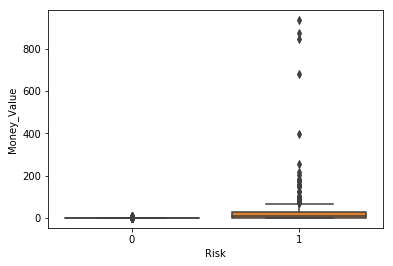

In [29]:
import seaborn as sns
ax = sns.boxplot(x="Risk", y="Money_Value", data=data)

C:\Users\eliza\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


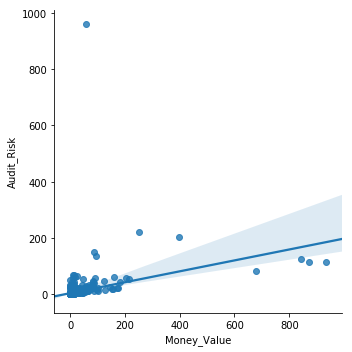

In [30]:
sns.lmplot(x="Money_Value", y="Audit_Risk",data=data);

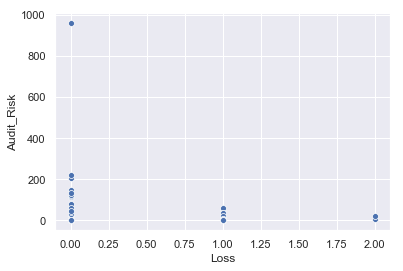

In [31]:
#loss and audit risk
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
x =  data['Loss']
y = data['Audit_Risk']
ax = sns.scatterplot(x=x, y=y)

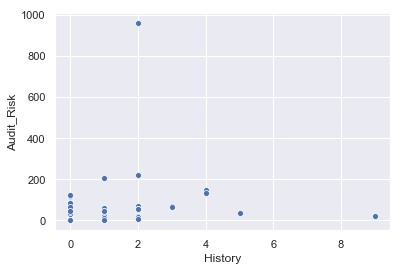

In [32]:
x =  data['History']
y = data['Audit_Risk']
ax = sns.scatterplot(x=x, y=y)

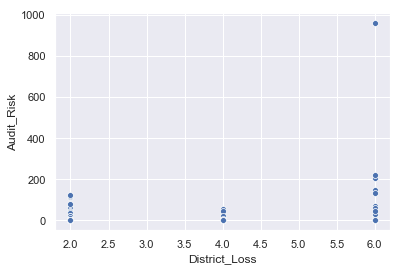

In [33]:
#district loss
x =  data['District_Loss']
y = data['Audit_Risk']
ax = sns.scatterplot(x=x, y=y)

In [34]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,Loss,LOSS_SCORE,History_score,T_Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.572680,0.5,7.168158,0.393041,2.237113,2.909794,0.029639,2.061856,2.167526,0.626289
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.444581,0.0,38.667494,0.488741,0.803517,1.597452,0.184280,0.375080,0.679869,0.484100
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.5,0.316700,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.5,0.555600,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.5,3.249900,1.000000,2.000000,4.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


# Does LOCATION_ID have any correlation to Risk or Risk_Audit?

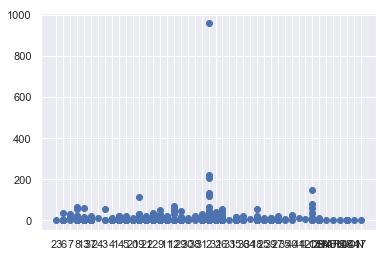

In [35]:
x = data['LOCATION_ID']
y = data['Audit_Risk']

plt.scatter(x, y)

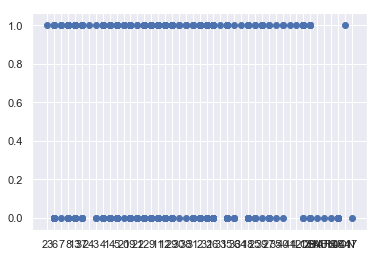

In [36]:
x = data['LOCATION_ID']
y = data['Risk']

plt.scatter(x, y)

C:\Users\eliza\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\eliza\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


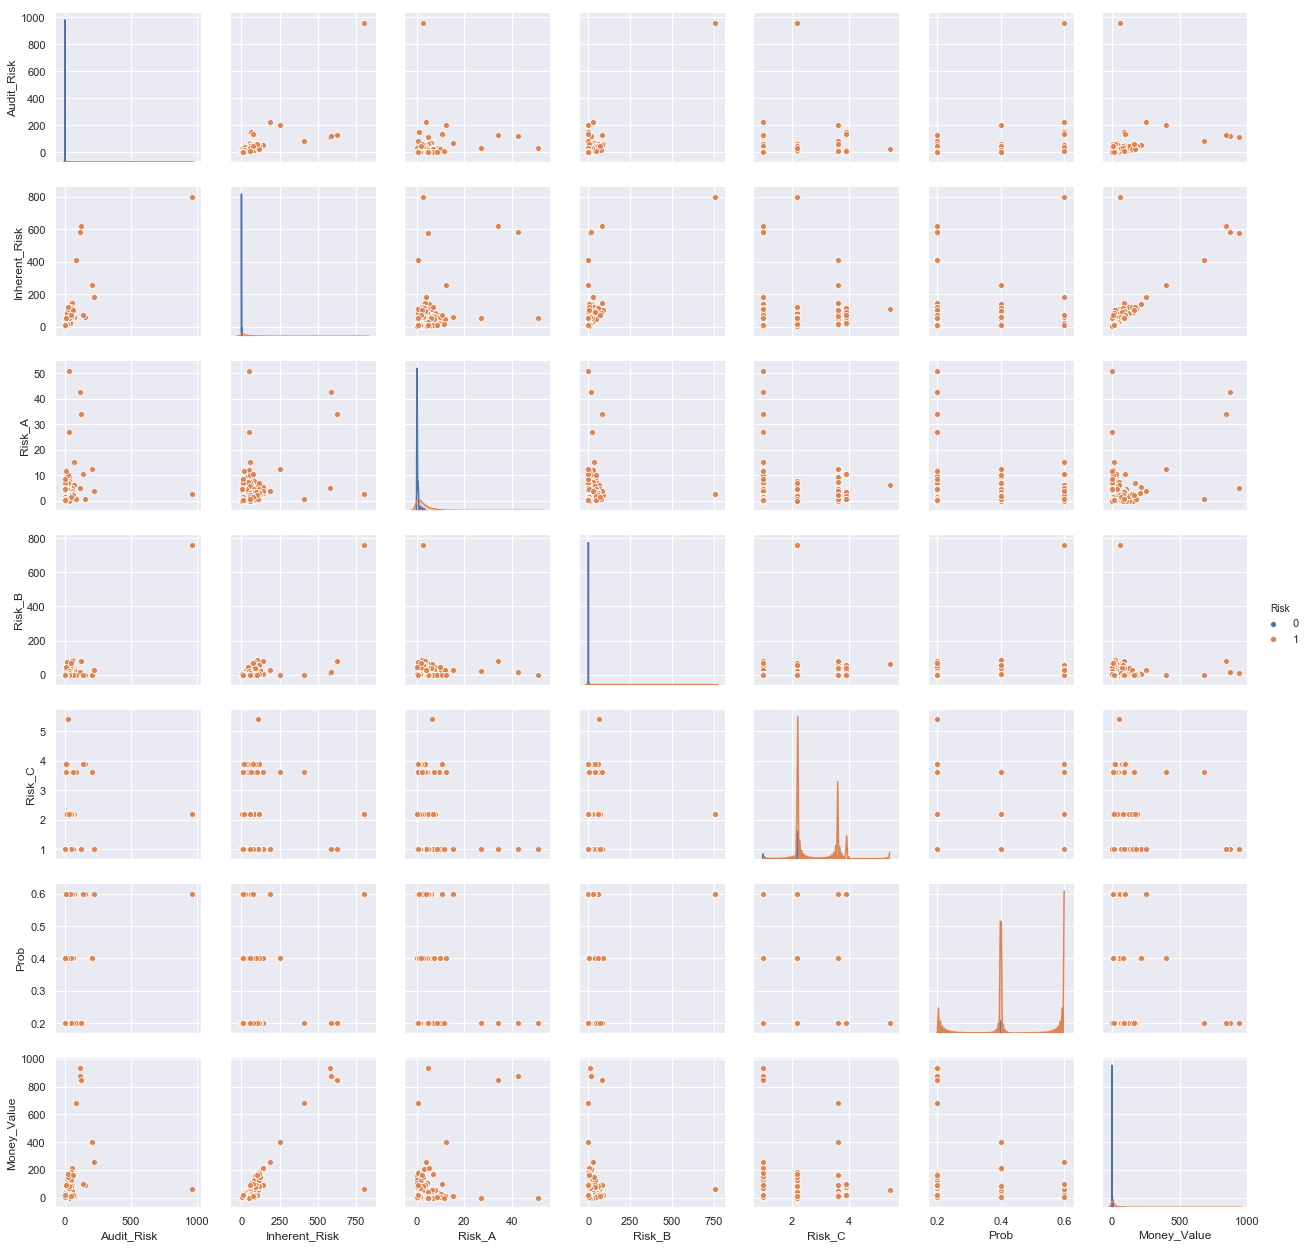

In [37]:
g = sns.pairplot(data, hue="Risk", vars=['Audit_Risk', 'Inherent_Risk', 'Risk_A', 'Risk_B', 'Risk_C', 'Prob', 'Money_Value'])

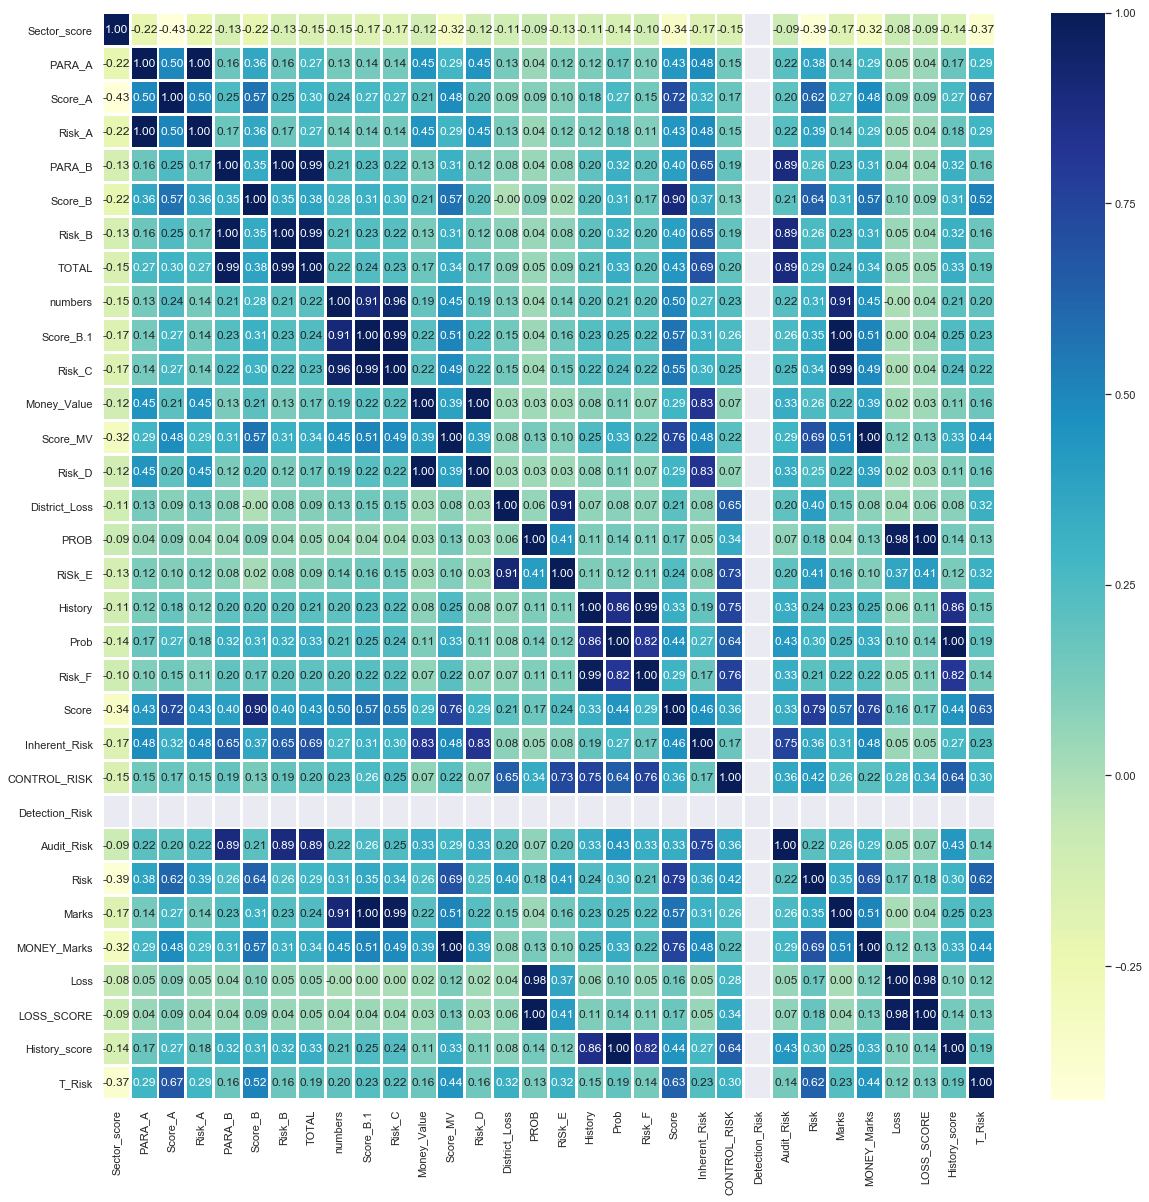

In [38]:
import seaborn as sns
plt.figure(figsize=(20,20))
d=data[['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A',
       'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers',
       'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D',
       'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk',
       'Marks', 'MONEY_Marks', 'Loss', 'LOSS_SCORE', 'History_score',
       'T_Risk']]
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
plt.savefig('heatmap.png')

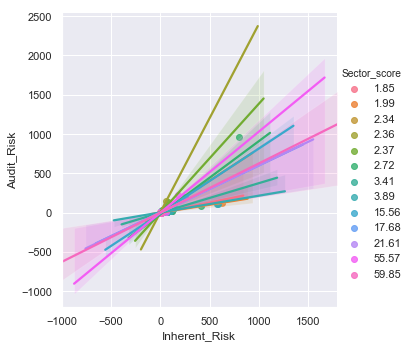

In [39]:
sns.lmplot(x="Inherent_Risk", y="Audit_Risk", hue="Sector_score", data=data);

# Data Preparation
- missing data
- imputation
- remove redundant features
- outliers
- transform 'Risk_Value' to log values for regression models

In [40]:
data['LOCATION_ID'].value_counts(dropna=False)

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
21          8
28          8
27          8
43          7
25          6
20          5
7           4
30          4
36          4
38          4
40          3
3           3
35          2
SAFIDON     1
42          1
NUH         1
41          1
33          1
44          1
24          1
LOHARU      1
17          1
34          1
23          1
Name: LOCATION_ID, dtype: int64

In [41]:
data['LOCATION_ID'] = pd.to_numeric(data['LOCATION_ID'], errors='coerce')

In [42]:
print(data[data.isnull().any(axis=1)])

     Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
351          1.99          NaN    0.30      0.2   0.060     0.0      0.2   
355          1.99          NaN    0.55      0.2   0.110     0.0      0.2   
367          1.99          NaN    0.48      0.2   0.096     0.0      0.2   
642         55.57          4.0    0.23      0.2   0.046     0.0      0.2   

     Risk_B  TOTAL  numbers   ...    CONTROL_RISK  Detection_Risk  Audit_Risk  \
351     0.0   0.30      5.0   ...             0.4             0.5      0.2920   
355     0.0   0.55      5.0   ...             0.4             0.5      0.3288   
367     0.0   0.48      5.0   ...             0.4             0.5      0.3180   
642     0.0   0.23      5.0   ...             0.4             0.5      0.2892   

     Risk  Marks  MONEY_Marks  Loss  LOSS_SCORE  History_score  T_Risk  
351     0      2            2     0           2              2       0  
355     0      2            2     0           2              2     

In [43]:
data.loc[642,]

Sector_score      55.5700
LOCATION_ID        4.0000
PARA_A             0.2300
Score_A            0.2000
Risk_A             0.0460
PARA_B             0.0000
Score_B            0.2000
Risk_B             0.0000
TOTAL              0.2300
numbers            5.0000
Score_B.1          0.2000
Risk_C             1.0000
Money_Value           NaN
Score_MV           0.2000
Risk_D             0.0000
District_Loss      2.0000
PROB               0.2000
RiSk_E             0.4000
History            0.0000
Prob               0.2000
Risk_F             0.0000
Score              2.0000
Inherent_Risk      1.4460
CONTROL_RISK       0.4000
Detection_Risk     0.5000
Audit_Risk         0.2892
Risk               0.0000
Marks              2.0000
MONEY_Marks        2.0000
Loss               0.0000
LOSS_SCORE         2.0000
History_score      2.0000
T_Risk             0.0000
Name: 642, dtype: float64

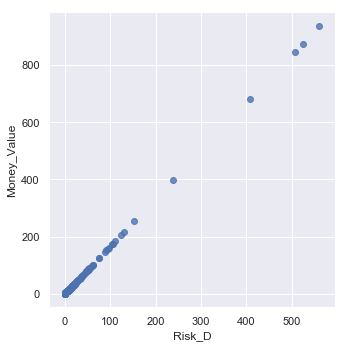

In [44]:
import seaborn as sns

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Risk_D", y="Money_Value", data=data, fit_reg=False, legend=False)

In [45]:
x = data['Money_Value']
y= data['Risk_D']
np.corrcoef(x, y)

array([[nan, nan],
       [nan,  1.]])

In [46]:
data2 = data[['Risk_D', 'Money_Value']]

In [47]:
data2[data2['Risk_D'] == 0]

,Risk_D,Money_Value
2,0.0,0.0
4,0.0,0.0
13,0.0,0.0
18,0.0,0.0
28,0.0,0.0
34,0.0,0.0
37,0.0,0.0
43,0.0,0.0
47,0.0,0.0
61,0.0,0.0


In [48]:
data.loc[642,'Money_Value'] = 0

In [49]:
data.loc[642,]

Sector_score      55.5700
LOCATION_ID        4.0000
PARA_A             0.2300
Score_A            0.2000
Risk_A             0.0460
PARA_B             0.0000
Score_B            0.2000
Risk_B             0.0000
TOTAL              0.2300
numbers            5.0000
Score_B.1          0.2000
Risk_C             1.0000
Money_Value        0.0000
Score_MV           0.2000
Risk_D             0.0000
District_Loss      2.0000
PROB               0.2000
RiSk_E             0.4000
History            0.0000
Prob               0.2000
Risk_F             0.0000
Score              2.0000
Inherent_Risk      1.4460
CONTROL_RISK       0.4000
Detection_Risk     0.5000
Audit_Risk         0.2892
Risk               0.0000
Marks              2.0000
MONEY_Marks        2.0000
Loss               0.0000
LOSS_SCORE         2.0000
History_score      2.0000
T_Risk             0.0000
Name: 642, dtype: float64

In [50]:
corr_matrix = data.corr()

corr_matrix['Audit_Risk'].sort_values(ascending=False)

Audit_Risk        1.000000
TOTAL             0.888096
PARA_B            0.887794
Risk_B            0.887570
Inherent_Risk     0.750903
History_score     0.431310
Prob              0.431310
CONTROL_RISK      0.358013
Risk_D            0.334184
Money_Value       0.334083
Score             0.332993
History           0.329773
Risk_F            0.327750
MONEY_Marks       0.291722
Score_MV          0.291722
Marks             0.259737
Score_B.1         0.259737
Risk_C            0.250025
Risk_A            0.221581
numbers           0.221461
PARA_A            0.219759
Risk              0.217113
Score_B           0.207975
RiSk_E            0.202983
Score_A           0.201847
District_Loss     0.199426
T_Risk            0.137042
LOSS_SCORE        0.073830
PROB              0.073830
Loss              0.049304
LOCATION_ID      -0.085276
Sector_score     -0.091954
Detection_Risk         NaN
Name: Audit_Risk, dtype: float64

In [51]:
data['Detection_Risk'].value_counts()

0.5    776
Name: Detection_Risk, dtype: int64

In [52]:
data['LOSS_SCORE'].value_counts()

2    754
4     20
6      2
Name: LOSS_SCORE, dtype: int64

In [53]:
data['District_Loss'].value_counts()

2    653
6     73
4     50
Name: District_Loss, dtype: int64

In [54]:
data.drop(['LOCATION_ID', 'Risk_D', 'Detection_Risk'], axis=1, inplace=True)

# Outlier Detection

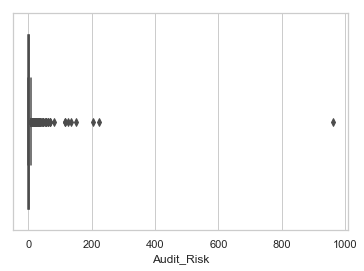

In [55]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x=data["Audit_Risk"])

In [56]:
data[data['Audit_Risk'] > 300]  #outliers were kept in as they could be an indicator of fraud

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,Loss,LOSS_SCORE,History_score,T_Risk
241,2.72,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,0.4,...,801.262,2.4,961.5144,1,4,6,0,2,6,1


# Use log(Audit_Risk) for Target Variable

In [57]:
# set target value / ** transform target variable to log
X = data.drop('Audit_Risk', axis=1)
y = data['Audit_Risk']
y_log = np.log(y)

# Split Test Data

In [58]:
from sklearn.model_selection import train_test_split

# split data into train and test set
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y_log, random_state=0)

In [59]:
# Use StandardScaler to scale feature set X. 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #instantiate
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\eliza\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# Regression Models:

# KNN Regressor Model

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#base model
knnr = KNeighborsRegressor()

#model param
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]} 

#build grid search
knnr_grid = GridSearchCV(knnr, param_grid, cv = 5, n_jobs = -1)

#train the model
knnr_grid.fit(X_train, y_train)

#evaluate the model
print("Best parameters: {}".format(knnr_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(knnr_grid.best_score_))

Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.964


In [98]:
import pandas as pd
# convert to DataFrame so we can read better
results_KNN_reg = pd.DataFrame(knnr_grid.cv_results_)
# show the first 5 rows
display(results_KNN_reg.head(10))

C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003000,3.814697e-07,0.005201,0.000752,1,{'n_neighbors': 1},0.964923,0.951193,0.973336,0.963706,...,0.964015,0.007236,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003598,1.854236e-03,0.006401,0.001200,2,{'n_neighbors': 2},0.957756,0.952641,0.971733,0.963510,...,0.964262,0.008576,1,0.989940,0.988643,0.988709,0.990382,0.989321,0.989399,0.000680
2,0.005000,4.290134e-03,0.006001,0.003033,3,{'n_neighbors': 3},0.948914,0.948991,0.968010,0.959855,...,0.959803,0.009889,3,0.981796,0.983225,0.980249,0.981608,0.978309,0.981037,0.001658
3,0.002400,1.853952e-03,0.004800,0.000401,4,{'n_neighbors': 4},0.948636,0.944247,0.957847,0.957787,...,0.953511,0.005982,4,0.975709,0.978117,0.972906,0.977147,0.971688,0.975114,0.002454
4,0.003201,2.400542e-03,0.004800,0.000401,5,{'n_neighbors': 5},0.945686,0.944754,0.944096,0.954525,...,0.948876,0.004982,5,0.970093,0.973249,0.967800,0.969882,0.964456,0.969096,0.002901
5,0.002000,1.326602e-06,0.004600,0.000491,6,{'n_neighbors': 6},0.946162,0.947172,0.926699,0.947997,...,0.943275,0.008303,6,0.963803,0.966486,0.962563,0.963138,0.958727,0.962943,0.002500
6,0.002000,2.259826e-06,0.005001,0.000632,7,{'n_neighbors': 7},0.946000,0.944318,0.923026,0.939326,...,0.939716,0.008670,7,0.959049,0.958584,0.955918,0.958896,0.956877,0.957865,0.001245
7,0.001998,6.306029e-04,0.005602,0.000488,8,{'n_neighbors': 8},0.943955,0.940322,0.924657,0.938621,...,0.938333,0.007138,8,0.950843,0.951683,0.950084,0.955617,0.955030,0.952651,0.002247
8,0.002199,7.493254e-04,0.005000,0.000632,9,{'n_neighbors': 9},0.940254,0.938370,0.928470,0.938430,...,0.936082,0.004185,9,0.943149,0.946292,0.946602,0.951867,0.951295,0.947841,0.003289
9,0.001999,9.122432e-07,0.005202,0.000751,10,{'n_neighbors': 10},0.937960,0.934726,0.927343,0.935180,...,0.933262,0.003683,10,0.939172,0.945982,0.944039,0.946961,0.947614,0.944754,0.003041


In [100]:
#predict on test data
KNNR = KNeighborsRegressor(2)
KNNR.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(KNNR.score(X_test, y_test)))

Accuracy on test set: 0.950


# Linear Regression Model

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
scores = cross_val_score(lreg, X_train, y_train, cv=5)  #this is w/o replacement/more splitting than random sampling
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96587291 0.9549291  0.96388436 0.96941928 0.96016542]
Average cross-validation score: 0.96


In [67]:
# predict on test data 

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(lreg.score(X_test, y_test)))

Accuracy on test set: 0.644


# Ridge Model

In [102]:
from  sklearn.linear_model import Ridge

ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]} 

rid_grid = GridSearchCV(ridge, param_grid, cv = 5, n_jobs = -1, return_train_score=True)
rid_grid.fit(X_train, y_train)

#evaluate the model
print("Best parameters: {}".format(rid_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(rid_grid.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.963


In [103]:
#predict on test data
ridg = Ridge(1)
ridg.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(ridg.score(X_test, y_test)))

Accuracy on test set: 0.674


# Lasso Model

In [104]:
from  sklearn.linear_model import Lasso

las = Lasso()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]} 

las_grid = GridSearchCV(las, param_grid, cv = 5, n_jobs = -1, return_train_score=True)
las_grid.fit(X_train, y_train)

#evaluate the model
print("Best parameters: {}".format(las_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(las_grid.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.962


In [105]:
#predict on test data
las = Lasso(alpha=0.01)
las.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(las.score(X_test, y_test)))

Accuracy on test set: 0.683


In [106]:
from sklearn.linear_model import Lasso

lasso = Lasso(0.01)
lasso.fit(X_train,y_train)

print("Number of features used: {}".format(np.sum(lasso.coef_ !=0)))

Number of features used: 19


In [107]:
print(X.columns[lasso.coef_ !=0]) 

Index(['Sector_score', 'Score_A', 'Risk_A', 'PARA_B', 'numbers', 'Score_MV',
       'District_Loss', 'PROB', 'RiSk_E', 'Prob', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Risk', 'MONEY_Marks', 'Loss', 'LOSS_SCORE',
       'History_score', 'T_Risk'],
      dtype='object')


C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


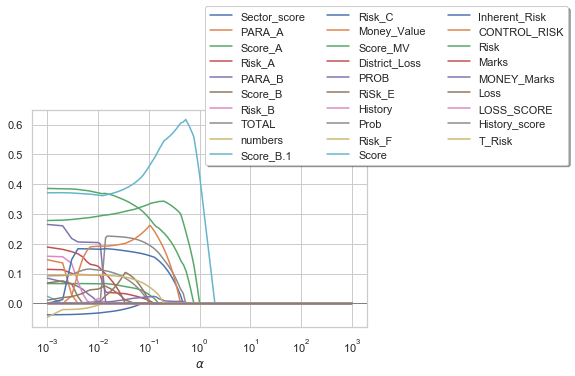

In [111]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,29):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Polynomial Regression  

In [82]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

lreg = LinearRegression()
for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    scores = cross_val_score(lreg, X_train_poly, y_train, cv=5) 
    train_score_list.append(scores.mean())
    test_score_list.append(lreg.score(X_test_poly, y_test))
    

print("Cross-validation scores for each polynomial:", train_score_list)
print("Test score for each polynomial:", test_score_list)

Cross-validation scores for each polynomial: [0.9628519142686555, -1.3610771712022801e+22, -4879402610275.979]
Test score for each polynomial: [0.6438894989478328, -4.362268658265981e+21, -229359700910071.56]


# SVM Linear Regression

In [112]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(epsilon=0, random_state=0, tol=1e-5)

param_grid = {'C': [0.01, 0.1, 1, 10, 100]} 

lsvr_grid = GridSearchCV(lsvr, param_grid, cv = 5, n_jobs = -1, return_train_score=True)
lsvr_grid.fit(X_train, y_train)

#evaluate the model
print("Best parameters: {}".format(lsvr_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(lsvr_grid.best_score_))

Best parameters: {'C': 0.01}
Best cross-validation score: 0.946


C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [113]:
# predict on test data 

SVR = LinearSVR(C=.01, epsilon=0, random_state=0, tol=1e-5)
SVR.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(SVR.score(X_test, y_test)))

Accuracy on test set: 0.561


# SVM Regression with Kernel='linear'

In [116]:
from sklearn.svm import SVR

svrl = SVR()

param_grid = {'gamma': [0.001, 0.01, 0, 0.1, 1, 10, 100],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear']}

svrl_grid = GridSearchCV(svrl, param_grid, cv = 5, n_jobs = -1, return_train_score=True)
svrl_grid.fit(X_train, y_train)

#evaluate the model
print("Best parameters: {}".format(svrl_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(svrl_grid.best_score_))

Best parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.949


In [117]:
#predict on test data
SVRl = SVR(kernel='linear', C=0.01, gamma=0.001)
SVRl.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(SVRl.score(X_test, y_test)))

Accuracy on test set: 0.572


# SVM Regression with Kernel='rbf'

In [118]:
from sklearn.svm import SVR

svrr = SVR()

param_grid = {'gamma': [0.001, 0.01, 0, 0.1, 1, 10, 100],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf']}

svrr_grid = GridSearchCV(svrl, param_grid, cv = 5, n_jobs = -1, return_train_score=True)
svrr_grid.fit(X_train, y_train)

#evaluate the model
print("Best parameters: {}".format(svrr_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(svrr_grid.best_score_))

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.989


In [119]:
#predict on test data
rbf = SVR(kernel='rbf', C=10, gamma=0.01)
rbf.fit(X_train, y_train)
rbf.predict(X_test)

print("Accuracy on test set: {:.3f}".format(rbf.score(X_test, y_test)))

Accuracy on test set: 0.956


# SVM Regression with Kernel='poly'

In [120]:
from sklearn.svm import SVR

svrp = SVR()

param_grid = {'gamma': [0.01, 0.1, 1, 10],
              'degree': [1, 2, 3],
              'kernel': ['poly']}

svrp_grid = GridSearchCV(svrp, param_grid, cv = 5, n_jobs = -1, return_train_score=True)
svrp_grid.fit(X_train, y_train)

#evaluate the model
print("Best parameters: {}".format(svrp_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(svrp_grid.best_score_))

Best parameters: {'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Best cross-validation score: 0.949


C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [121]:
#predict on test data
kpoly = SVR(kernel='poly', degree=1, gamma=0.01)
kpoly.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(kpoly.score(X_test, y_test)))

Accuracy on test set: 0.572


# Decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

grid_param = {'max_depth':[1, 2, 3, 5, 7, 11, 19]}

dtr_grid = GridSearchCV(dtr, grid_param, cv = 5, n_jobs = -1)
dtr_grid.fit(X_train, y_train)

print("Best parameters: {}".format(dtr_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(dtr_grid.best_score_))

Best parameters: {'max_depth': 11}
Best cross-validation score: 0.983


In [123]:
#predict on test data
tree = DecisionTreeRegressor(max_depth=11)
tree.fit(X_train, y_train)

print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on test set: 0.956


In [124]:
feature_names = list(X.columns.values)

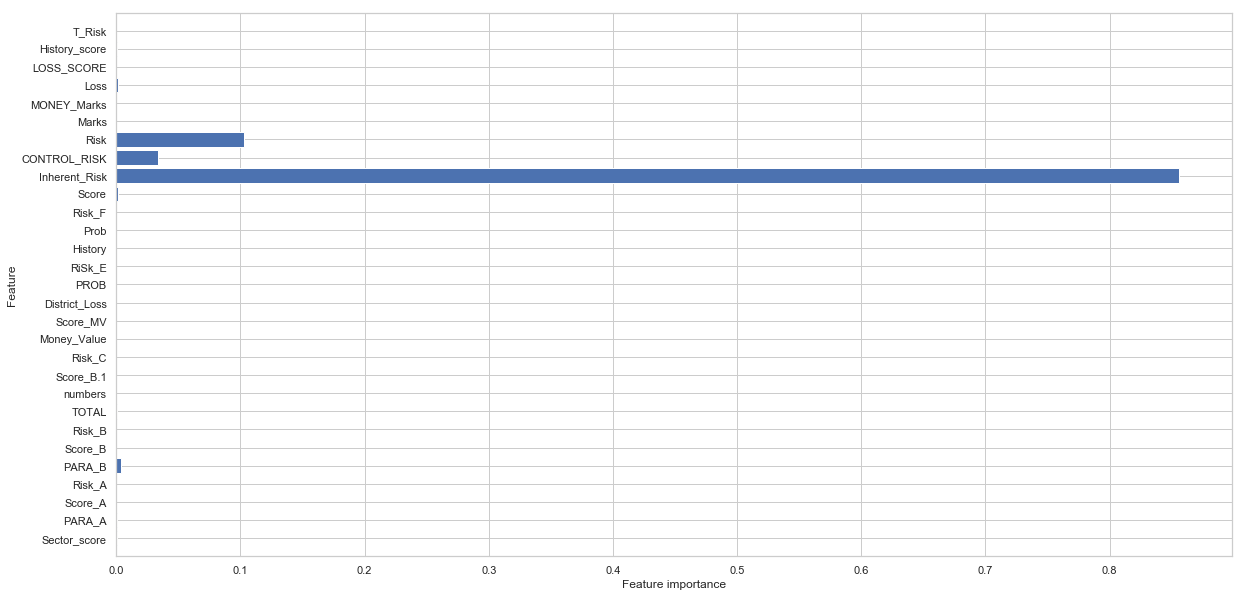

In [125]:
%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(20,10))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

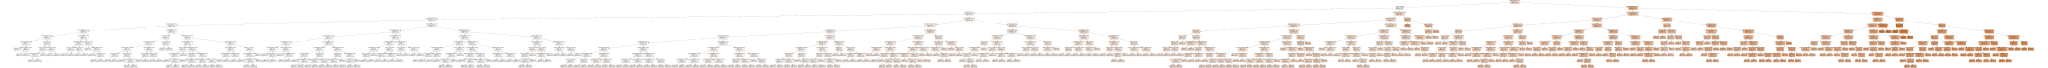

In [126]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=feature_names) 
# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

# Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

param_grid = {'n_estimators': [10, 20, 50],
              'random_state': [0]} 

rfr_grid = GridSearchCV(rfr, param_grid, cv = 5, n_jobs = -1)
rfr_grid.fit(X_train, y_train)

print("Best parameters: {}".format(rfr_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(rfr_grid.best_score_))

Best parameters: {'n_estimators': 20, 'random_state': 0}
Best cross-validation score: 0.991


In [135]:
#predict on test data
rfr = RandomForestRegressor(n_estimators=20, random_state=0)
rfr.fit(X_train, y_train)
rfr.predict(X_test)

print("Accuracy on test set: {:.3f}".format(rfr.score(X_test, y_test)))

Accuracy on test set: 0.974


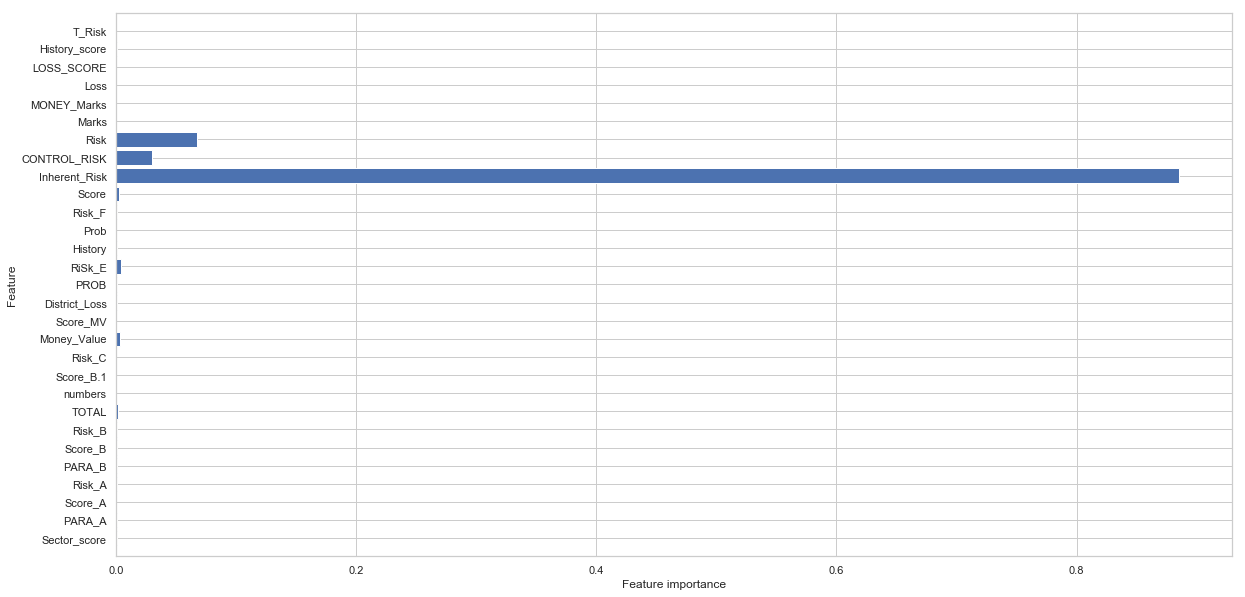

In [136]:
%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(20,10))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(rfr)

In [131]:
print(dict(zip(X.columns, rfr.feature_importances_)))

{'Sector_score': 0.00037987086924647464, 'PARA_A': 0.0014914871455455434, 'Score_A': 1.1398192734409605e-05, 'Risk_A': 0.0005355839258093505, 'PARA_B': 0.0011996027468929907, 'Score_B': 0.00014401863148635097, 'Risk_B': 0.0005020240618738716, 'TOTAL': 0.0012090164949978177, 'numbers': 1.0230598077801095e-05, 'Score_B.1': 0.0002311726861545611, 'Risk_C': 0.00026004606402254307, 'Money_Value': 0.004861148072574847, 'Score_MV': 3.172218670197139e-05, 'District_Loss': 0.0006161134654277575, 'PROB': 0.0006850706605483973, 'RiSk_E': 0.0037019199367987602, 'History': 0.0004124323678273712, 'Prob': 0.0001158400081450277, 'Risk_F': 0.0002260120777708127, 'Score': 0.0030214703642745416, 'Inherent_Risk': 0.8805942567683903, 'CONTROL_RISK': 0.026810312547300163, 'Risk': 0.07186550948007929, 'Marks': 5.6468403657818903e-05, 'MONEY_Marks': 2.7097315395051362e-05, 'Loss': 0.00045811339396755894, 'LOSS_SCORE': 2.369141714820866e-06, 'History_score': 0.0005396882172160647, 'T_Risk': 4.175367890520425e-

# Classification  Models:

# Split Test Set Data Scale Using MinMaxScaler

In [137]:
# set target value, drop Audit_Risk to prevent data leakage  gapminder_ocean.drop([70,71],axis=0)
X = data.drop(['Risk', 'Audit_Risk'], axis=1)
y = data['Risk']

In [138]:
from sklearn.model_selection import train_test_split

# split data into train and test set
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)

In [139]:
# Use MinMaxScaler for classificaion problems. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #instantiate
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# KNN Classification

In [140]:
from sklearn.model_selection import GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier()

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

knnc_grid = GridSearchCV(knnc, param_grid, cv=5, n_jobs=-1, scoring='recall')
knnc_grid.fit(X_train, y_train)
print("Best parameters: {}".format(knnc_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(knnc_grid.best_score_))

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.962


C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [141]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score

#predict on test data
KNNc = KNeighborsClassifier(1)
KNNc.fit(X_train, y_train)
pred_KNNc = KNNc.predict(X_test)

confusion = confusion_matrix(y_test, pred_KNNc)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_KNNc))
print('Precision : ', precision_score(y_test, pred_KNNc))
print('Recall : ', recall_score(y_test, pred_KNNc))

Confusion matrix:
[[122   2]
 [  2  68]]
Accuracy :  0.979381443298969
Precision :  0.9714285714285714
Recall :  0.9714285714285714


# Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'max_iter' : [5000],
            'solver':  ['saga']}

log_grid = GridSearchCV(logr, param_grid, cv=5, n_jobs=-1, scoring='recall')
log_grid.fit(X_train, y_train)
print("Best parameters: {}".format(log_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(log_grid.best_score_))

Best parameters: {'C': 1000, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.979


In [143]:
#predict on test data
logr = LogisticRegression(C=1000, max_iter=5000, penalty='l2', solver='saga')
logr.fit(X_train, y_train)
pred_logr = logr.predict(X_test)

confusion = confusion_matrix(y_test, pred_logr)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_logr))
print('Precision : ', precision_score(y_test, pred_logr))
print('Recall : ', recall_score(y_test, pred_logr))

Confusion matrix:
[[124   0]
 [  2  68]]
Accuracy :  0.9896907216494846
Precision :  1.0
Recall :  0.9714285714285714


# Linear Support Vector Machine

In [144]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


lsvc = LinearSVC()
scores = cross_val_score(lsvc, X_train, y_train, cv=5, scoring='recall')  
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.95744681 0.91489362 0.93617021 0.93617021 0.95744681]
Average cross-validation score: 0.94


In [145]:
# predict on test data 

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
pred = lsvc.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))

Confusion matrix:
[[124   0]
 [  3  67]]
Accuracy :  0.9845360824742269
Precision :  1.0
Recall :  0.9571428571428572


# Kerenilzed Support Vector Machine

# SVC with Kernel='linear'

In [146]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {'gamma': [0.001, 0.01, 0, 0.1, 1, 10, 100],
              'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
              'kernel': ['linear']}

svc_grid = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, scoring='recall')
svc_grid.fit(X_train, y_train)
print("Best parameters: {}".format(svc_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(svc_grid.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.957


In [147]:
#predict on test data
SVCl = SVC(C=100, gamma=0.001, kernel='linear')
SVCl.fit(X_train, y_train)
pred_svc = SVCl.predict(X_test)

confusion = confusion_matrix(y_test, pred_svc)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_svc))
print('Precision : ', precision_score(y_test, pred_svc))
print('Recall : ', recall_score(y_test, pred_svc))

Confusion matrix:
[[124   0]
 [  2  68]]
Accuracy :  0.9896907216494846
Precision :  1.0
Recall :  0.9714285714285714


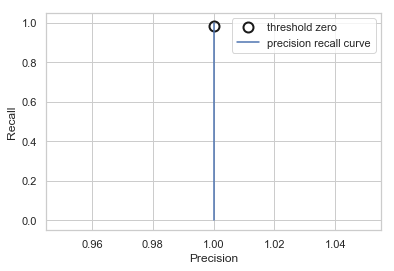

In [148]:
from sklearn.metrics import precision_recall_curve
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, SVCl.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# SVC with Kernel='rbf'

In [149]:
from sklearn.svm import SVC

svcr = SVC()

param_grid = {'gamma': [0.001, 0.01, 0, 0.1, 1, 10, 100],
              'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
              'kernel': ['rbf']}

svcr_grid = GridSearchCV(svcr, param_grid, cv=5, n_jobs=-1, scoring='recall')
svcr_grid.fit(X_train, y_train)
print("Best parameters: {}".format(svcr_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(svcr_grid.best_score_))

Best parameters: {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}
Best cross-validation score: 0.996


C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [150]:
#predict on test data
SVCr = SVC(C=0.1, gamma=100, kernel='rbf')
SVCr.fit(X_train, y_train)
pred_svcr = SVCr.predict(X_test)


confusion = confusion_matrix(y_test, pred_svcr)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_svcr))
print('Precision : ', precision_score(y_test, pred_svcr))
print('Recall : ', recall_score(y_test, pred_svcr))

Confusion matrix:
[[109  15]
 [  1  69]]
Accuracy :  0.9175257731958762
Precision :  0.8214285714285714
Recall :  0.9857142857142858


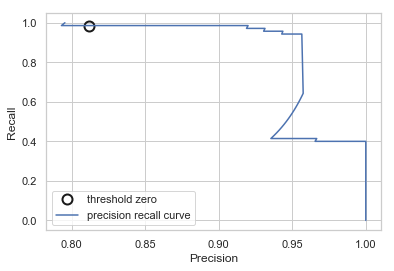

In [151]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, SVCr.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# SVC with Kernel='sigmoid'

In [152]:
from sklearn.svm import SVC

svcs = SVC()

param_grid = {'gamma': [0.001, 0.01, 0, 0.1, 1, 10, 100],
              'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
              'kernel': ['sigmoid']}

svcs_grid = GridSearchCV(svcs, param_grid, cv=5, n_jobs=-1, scoring='recall')
svcs_grid.fit(X_train, y_train)
print("Best parameters: {}".format(svcs_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(svcs_grid.best_score_))

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
Best cross-validation score: 1.000


C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [153]:
#predict on test data
SVCs = SVC(C=0.1, gamma=1, kernel='sigmoid')
SVCs.fit(X_train, y_train)
pred_svcs = SVCr.predict(X_test)


confusion = confusion_matrix(y_test, pred_svcs)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_svcs))
print('Precision : ', precision_score(y_test, pred_svcs))
print('Recall : ', recall_score(y_test, pred_svcs))

Confusion matrix:
[[109  15]
 [  1  69]]
Accuracy :  0.9175257731958762
Precision :  0.8214285714285714
Recall :  0.9857142857142858


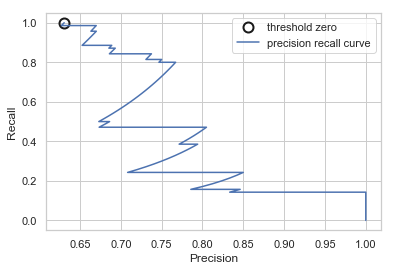

In [154]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, SVCs.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# SVC with Kernel='poly'

In [155]:
from sklearn.svm import SVC

svcp = SVC()

param_grid = {'degree': [1, 2, 3],
              'C': [0.01, 0.1, 1.0, 10],
               'gamma': [0.01, 0.1, 1.0, 10],
              'kernel': ['poly']}

svcp_grid = GridSearchCV(svcp, param_grid, cv=5, n_jobs=-1, scoring='recall')
svcp_grid.fit(X_train, y_train)
print("Best parameters: {}".format(svcp_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(svcp_grid.best_score_))

Best parameters: {'C': 1.0, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
Best cross-validation score: 0.962


In [156]:
#predict on test data
SVCp = SVC(C=1, degree=2, gamma=10, kernel='poly')
SVCp.fit(X_train, y_train)
pred_svcp = SVCr.predict(X_test)


confusion = confusion_matrix(y_test, pred_svcp)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_svcp))
print('Precision : ', precision_score(y_test, pred_svcp))
print('Recall : ', recall_score(y_test, pred_svcp))

Confusion matrix:
[[109  15]
 [  1  69]]
Accuracy :  0.9175257731958762
Precision :  0.8214285714285714
Recall :  0.9857142857142858


# Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'random_state': [0]} 

dtc_grid = GridSearchCV(dtc, param_grid, cv=5, n_jobs=-1, scoring='recall')
dtc_grid.fit(X_train, y_train)
print("Best parameters: {}".format(dtc_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(dtc_grid.best_score_))

Best parameters: {'max_depth': 5, 'random_state': 0}
Best cross-validation score: 0.992


In [158]:
#predict on test data
dtreec = DecisionTreeClassifier(random_state=0, max_depth=5)
dtreec.fit(X_train, y_train)
pred_dt = dtreec.predict(X_test)

confusion = confusion_matrix(y_test, pred_dt)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_dt))
print('Precision : ', precision_score(y_test, pred_dt))
print('Recall : ', recall_score(y_test, pred_dt))

Confusion matrix:
[[124   0]
 [  0  70]]
Accuracy :  1.0
Precision :  1.0
Recall :  1.0


In [159]:
feature_names = list(X.columns.values)

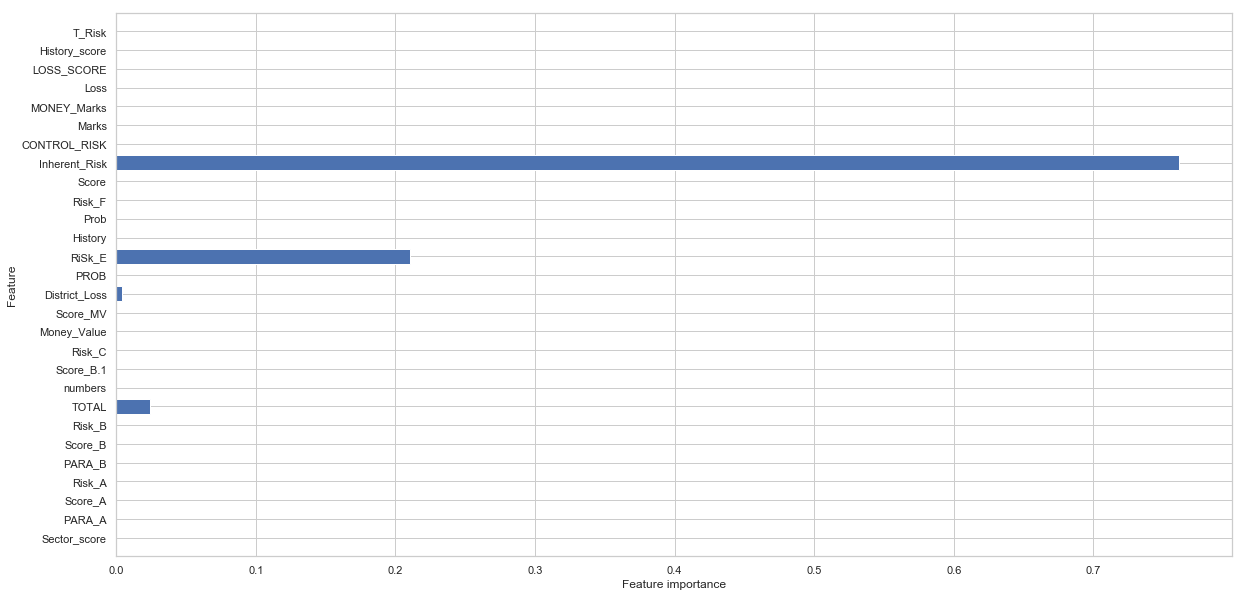

In [160]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(20,10))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtreec)

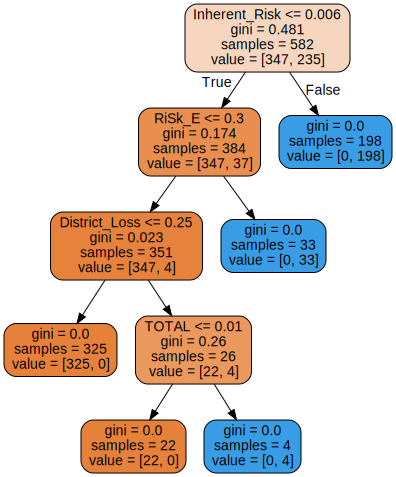

In [161]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtreec, out_file=None, filled=True, rounded=True, feature_names=feature_names) 
# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

# Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {'n_estimators': [10, 50, 100, 200, 500],
              'random_state': [0]} 

rfc_grid = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1, scoring='recall')
rfc_grid.fit(X_train, y_train)
print("Best parameters: {}".format(rfc_grid.best_params_))
print("Best cross-validation score: {:.3f}".format(rfc_grid.best_score_))

Best parameters: {'n_estimators': 50, 'random_state': 0}
Best cross-validation score: 0.983


In [163]:
#predict on test data
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

confusion = confusion_matrix(y_test, pred_rf)
print("Confusion matrix:\n{}".format(confusion))
print('Accuracy : ', accuracy_score(y_test, pred_rf))
print('Precision : ', precision_score(y_test, pred_rf))
print('Recall : ', recall_score(y_test, pred_rf))

Confusion matrix:
[[123   1]
 [  1  69]]
Accuracy :  0.9896907216494846
Precision :  0.9857142857142858
Recall :  0.9857142857142858


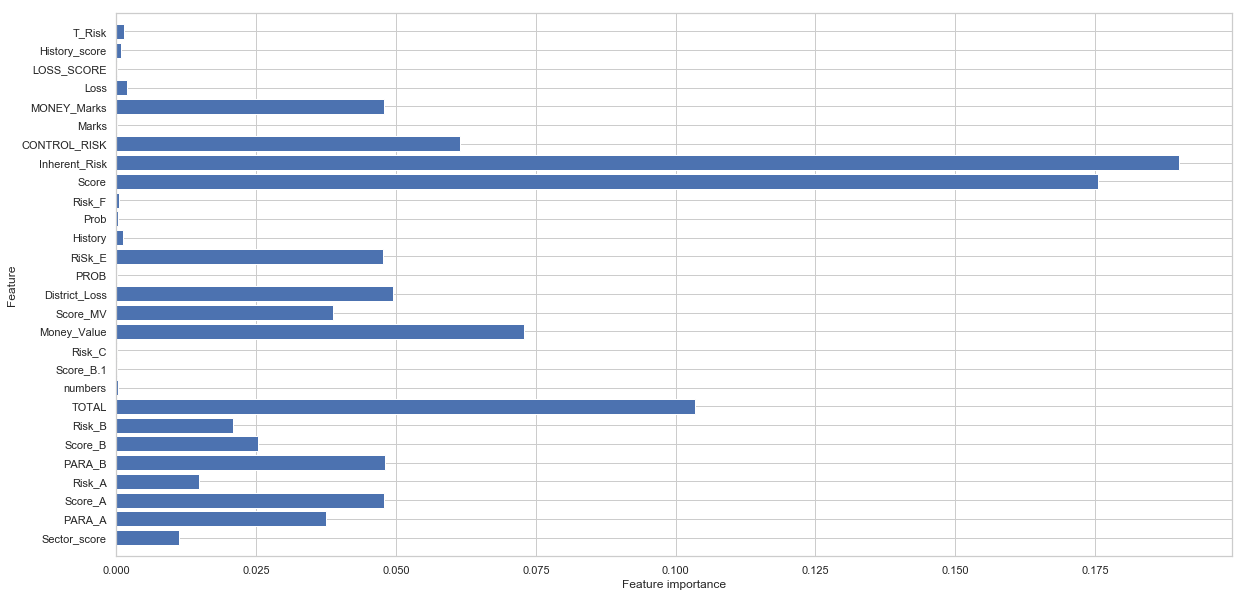

In [165]:
%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(20,10))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(rf)